In [6]:
# Autor : Maria Camargo
#IMPORTAR LAS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Accediendo al archivo CSV
dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')
clasificadores = ['Benigno','Maligno']

In [10]:
dataframe.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [12]:
dataframe.describe()

,BIRADS,Age,Shape,Margin,Density,Severity
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,4.314634,55.739024,2.775610,2.808537,2.915854,0.481707
std,0.669248,14.684062,1.243647,1.569295,0.351508,0.499970
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [14]:
#Cantidad de instancias por clases
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

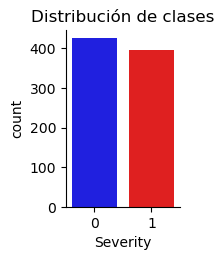

In [24]:
#Mostrar grafico de barras
import seaborn as sb
#Aseguramos que los números son enteros
dataframe['Severity']= dataframe['Severity'].astype(int)
sb.catplot(x='Severity',hue='Severity',data=dataframe,kind="count",height=2.5, aspect=0.8,palette={0:"blue",1:"red"},legend= False)
plt.title("Distribución de clases")
plt.show()

In [64]:
#Separamos el dataframe en x y
y=dataframe['Severity']
x=dataframe.drop('Severity',axis=1)

              precision    recall  f1-score   support

     Benigno       0.73      0.87      0.79       119
     Maligno       0.85      0.70      0.77       127

    accuracy                           0.78       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.78      0.78       246



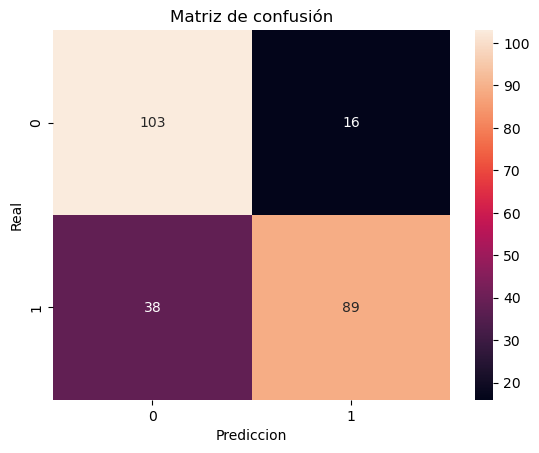

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=1)

knn_mm.fit(x_train,y_train)

predicciones=knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True,fmt="d")
plt.title("Matriz de confusión")
plt.xlabel('Prediccion')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

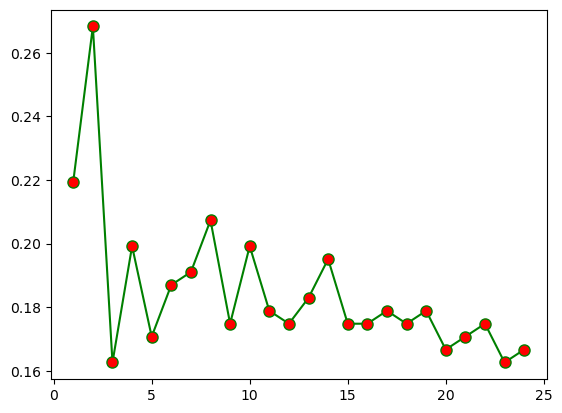

In [66]:
#BUSCAR TASA DE ERROR PARA ENCONTRAR EL K OPTIMO
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train, y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))
valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor = 'red', markersize='8')

In [5]:
knn_mm = KNeighborsClassifier(n_neighbors=3)
knn_mm.fit(x_train,y_train)
predicciones=knn_mm.predict(x_test)

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True,fmt="d")
plt.title("Matriz de confusión")
plt.xlabel('Prediccion')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

NameError: name 'KNeighborsClassifier' is not defined

In [7]:
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))

NameError: name 'knn_mm' is not defined

In [9]:
print(knn_mm.predict(pd.DataFrame([[4,65,3,5,3]], columns=x.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[4,65,3,5,3]], columns=x.columns)))

NameError: name 'knn_mm' is not defined